In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Model

In [28]:
# Instantiating ImageDataGenerator and normalizing the RGB values
traingen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testgen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Creating training data generator
train_data = traingen.flow_from_directory(
    # Specifying location of training data
    directory='data_split/train',
    # Re-sizing images to 50x50
    target_size=(50, 50),
    # Class mode to binary to recoginize the two directories "Normal" and "PNA" as the labels
    class_mode='binary',
    batch_size=15,
    seed=16
)
# Creating testing data generator
test_data = testgen.flow_from_directory(
    # Specifying location of testing data
    directory='data_split/test',
    # Re-sizing images to 50x50
    target_size=(50, 50),
    # Class mode to binary to recoginize the two directories "Normal" and "PNA" as the labels
    class_mode='binary',
    batch_size=15,
    seed=16
)

# Creating validation set
val_data = valgen.flow_from_directory(
    # Specifying location of testing data
    directory='data_split/val',
    # Re-sizing images to 50x50
    target_size=(50, 50),
    # Class mode to binary to recoginize the two directories "Normal" and "PNA" as the labels
    class_mode='binary',
    batch_size=15,
    seed=16
)

Found 5224 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
# Putting image classification into a dataframe
classes = pd.DataFrame(train_data.classes)
values = classes.value_counts()

In [14]:
classes

,0
0,0
1,0
2,0
3,0
4,0
...,...
5219,1
5220,1
5221,1
5222,1


In [15]:
# Giving the data binary labels to allow for visialization of class imbalance below.
class_dict = {0:'Normal', 1:'PNA'}
classes[0] = classes[0].map(class_dict)

In [16]:
image_interpretation = classes[0].value_counts()
image_interpretation

PNA       3883
Normal    1341
Name: 0, dtype: int64

In [17]:
image_interpretation.index

Index(['PNA', 'Normal'], dtype='object')

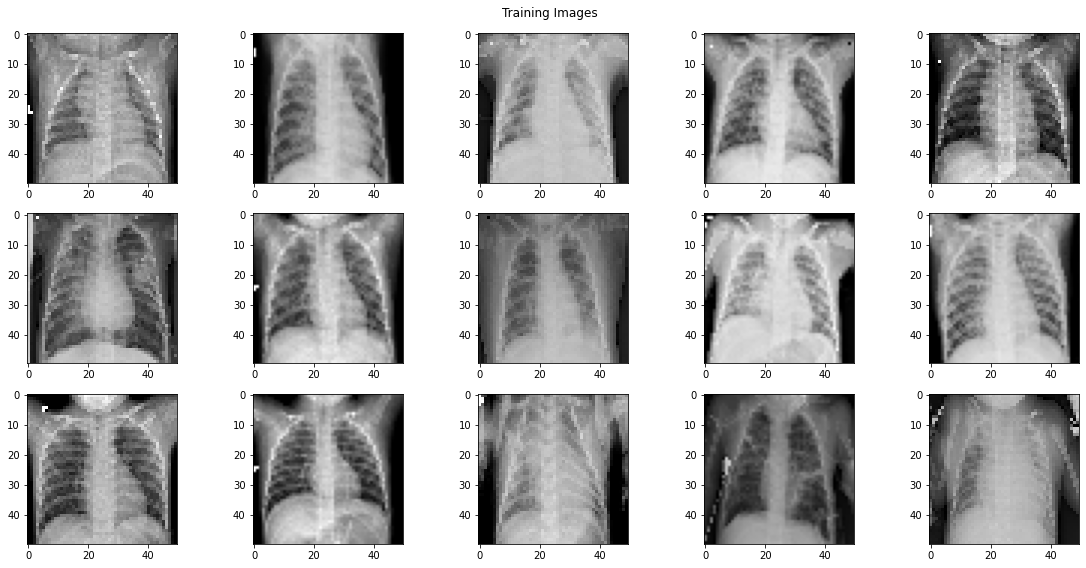

In [30]:
# Visualize
train_batch = train_data.next()
fig, axes = plt.subplots(3, 5, figsize=(16, 8))
    
for i in range(15):
    # Load image into numpy array and re-scale
    img = np.array(train_batch[0][i] * 255, dtype='uint8')
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
fig.suptitle('Training Images')
plt.tight_layout()
plt.show()

### Baseline Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50, 50, 1)         4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_0 = keras.Sequential(
    [   keras.Input(shape=(50,50,3)), 
        keras.layers.Flatten(), 
        keras.layers.Dense(1, activation="sigmoid"),
    ])
model_0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7501      
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_0.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
model_0.fit(train_data, epochs=3, batch_size=15, validation_data=(test_data))

Epoch 1/3
349/349 [==============================] - 68s 195ms/step - loss: 0.4503 - accuracy: 0.8178 - val_loss: 0.4143 - val_accuracy: 0.8013
Epoch 2/3
349/349 [==============================] - 71s 202ms/step - loss: 0.2588 - accuracy: 0.8976 - val_loss: 0.5739 - val_accuracy: 0.7708
Epoch 3/3
349/349 [==============================] - 78s 222ms/step - loss: 0.2337 - accuracy: 0.9112 - val_loss: 0.8774 - val_accuracy: 0.7340


In [ ]:
model_1 = keras.Sequential()
model_1.add(Dense(1, activation='sigmoid', input_shape=(50,50,3)))
model_1.summary()

In [ ]:
model_1 = models.Sequential()
model_1.add(Dense(units, activation=’sigmoid’, input_shape=(50,50,3)))
model_1.add(Dense(units=1, activation=’sigmoid’))
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', ‘recall’, ‘precision’])